In [79]:
import numpy as np 
import pandas as pd
import opendatasets as od
import seaborn as sns
import matplotlib as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import os
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier


In [63]:
url='https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database'

In [64]:
od.download(url)

Skipping, found downloaded files in ".\pima-indians-diabetes-database" (use force=True to force download)


In [65]:
data_dir='pima-indians-diabetes-database'

In [66]:
os.listdir(data_dir)

['diabetes.csv']

In [67]:
df=pd.read_csv(data_dir+'/diabetes.csv')

In [68]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


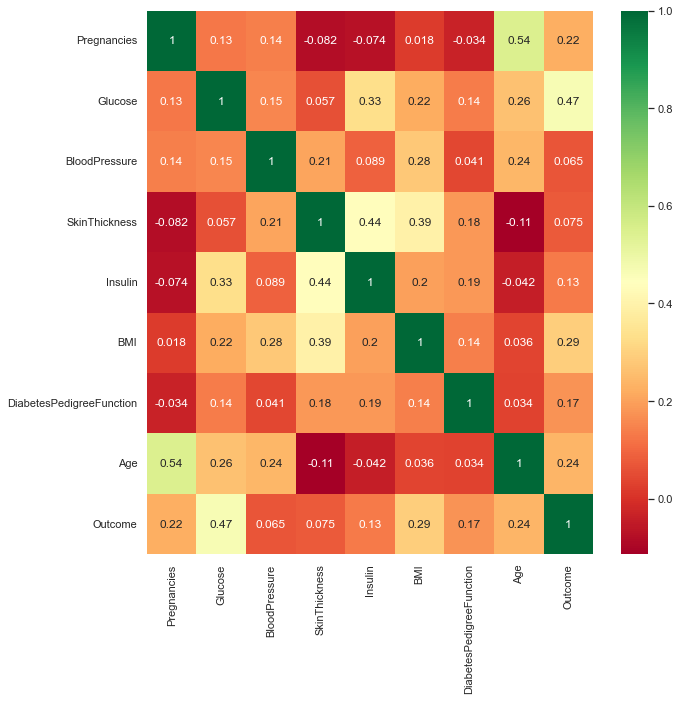

In [71]:
corrmat=df.corr()
top_corr_features=corrmat.index
sns.set(rc={"figure.figsize":(10, 10)})
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [72]:
X=df.drop(columns='Outcome',axis=1)
y=df.Outcome

In [73]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0)


In [75]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())


RandomForestClassifier(random_state=10)

In [76]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.766


In [77]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [80]:
classifier=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)


In [81]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [82]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

ERROR! Session/line number was not unique in database. History logging moved to new session 41
